## MACHO-OGLE Compare
<b>Author:</b> Nicholas Hunt-Walker<br/>
<b>Date:</b> 5/26/2015<br/>

###MACHO Sample (Pub 2001)
<b>Variable Stars in the Magellanic Clouds</b><br />
<b>Source</b>: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=II/247&-to=3">Vizier</a><br />
<b>Sample Size</b>: 21,747<br/>
<b>Magnitudes</b>:
    <ul>
        <li>Averaged Kron-Cousins V-magnitude (440-590 nm)</li>
        <li>Averaged Kron-Cousins R-magnitude (590-780 nm)</li>
        <li>Filter Curves: <a href="http://www.noao.edu/kpno/manuals/dim/harrisn99.jpg">here</a></li>
    </ul>
    
###OGLE Sample (Pub 2009)
<b>OGLE-III On-line Catalog of Variable Stars</b><br />
<b>Source</b>: <a href="http://ogledb.astrouw.edu.pl/~ogle/CVS/lpv_query.html">OGLE Long Period Variables Database Query Page</a><br />
<b>Sample Size</b>: 46,182 (LMC); 6,509 (SMC)<br/>
<b>Magnitudes</b>:
    <ul>
        <li>Averaged V-magnitude (480-580 nm)</li>
        <li>Averaged I-magnitude (730-870 nm)</li>
        <li>Filter Curves: <a href="http://ogle.astrouw.edu.pl/main/OGLEIV/mosaic.html">here</a>*It's OGLE-IV but the filters shouldn't have shifted wavelength ranges between OGLE generations</li>
    </ul>

Both have periods in units of days
###Procedure
<ul>
    <li>OGLE-III sample was obtained from the sourced site for LMC and SMC populations</li>
    <li>Produced coordinate list for all objects</li>
    <li>Coordinate list matched to MACHO within 3" using Vizier</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import MySQLdb

In [2]:
db = MySQLdb.connect(host="localhost", user="root", passwd="root", db="agbtables")
cursor = db.cursor()

In [3]:
ogle_qry = "SELECT * FROM ogle3_agbs WHERE field LIKE '%LMC%';"
ogle = pd.read_sql(ogle_qry, db)
ogle["W_I"] = ogle.I_mean - 1.55*(ogle.V_mean - ogle.I_mean)
ogle = ogle[ogle["W_I"] < 100]

macho_qry = "SELECT * FROM macho_raw;"
macho = pd.read_sql(macho_qry, db)

match_qry = "SELECT * FROM macho_ogle_match_alldata;"
match = pd.read_sql(match_qry, db)
match = match[match.V_mean > 0]

In [4]:
## numbers for each population
print "OGLE LMC objects: %i" % len(ogle)
print "MACHO objects: %i" % len(macho)
print "Matched objects: %i" % len(match)

OGLE LMC objects: 45764
MACHO objects: 21474
Matched objects: 2467


In [5]:
def plot_mag_period(df, period, mag, xtitle, ytitle, xlim=None, ylim=None, figsize=(4,4), histo=False):
    fig = plt.figure(figsize=figsize)
    if histo:
        H, xedges, yedges = np.histogram2d(np.log10(df[period]), df[mag], bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(np.log10(H.T), extent=extent, aspect="auto", interpolation="nearest", origin="lower")
        
    else:
        plt.scatter(np.log10(df[period]), df[mag], s=1, edgecolor='None')
        
    plt.minorticks_on()
    plt.xlabel(xtitle)
    if xlim:
        plt.xlim(xlim)
    plt.ylabel(ytitle)
    if ylim:
        plt.ylim(ylim)
    plt.show()

In [6]:
def plot_ra_dec(df, xlim=None, ylim=None, figsize=(4,4), histo=False):
    fig = plt.figure(figsize=figsize)
    if histo:
        H, xedges, yedges = np.histogram2d(df.ra, df.decl, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(np.log10(H.T), extent=extent, aspect="auto", interpolation="nearest", origin="lower")
        
    else:
        plt.scatter(df.ra, df.decl, s=1, edgecolor='None')
        
    plt.minorticks_on()
    plt.xlabel("RA (deg)")
    if xlim:
        plt.xlim(xlim)
    plt.ylabel("Dec (deg)")
    if ylim:
        plt.ylim(ylim)
    plt.show()

In [7]:
def plot_color_mag(df, mag1, mag2, ymag, xtitle, ytitle, xlim=None, ylim=None, figsize=(4,4), histo=False):
    fig = plt.figure(figsize=figsize)
    if histo:
        H, xedges, yedges = np.histogram2d((df[mag1] - df[mag2]), df[ymag], bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(np.log10(H.T), extent=extent, aspect="auto", interpolation="nearest", origin="lower")
        
    else:
        plt.scatter((df[mag1] - df[mag2]), df[ymag], s=1, edgecolor='None')
        
    plt.minorticks_on()
    plt.xlabel(xtitle)
    if xlim:
        plt.xlim(xlim)
    plt.ylabel(ytitle)
    if ylim:
        plt.ylim(ylim)
    plt.show()

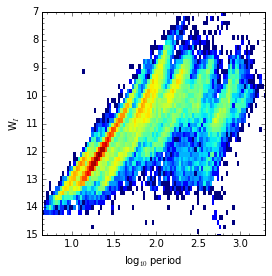

In [8]:
## OGLE data shows clear period-luminosity relationship
## W_I is a color-corrected I magnitude
plot_mag_period(ogle, "p", "W_I", "log$_{10}$ period", "W$_I$", ylim=(15,7), histo=True)

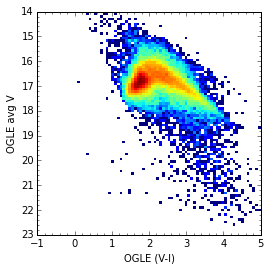

In [9]:
plot_color_mag(ogle, "V_mean", "I_mean", "V_mean", "OGLE (V-I)", "OGLE avg V", xlim=(-1,5), ylim=(23, 14), histo=True)

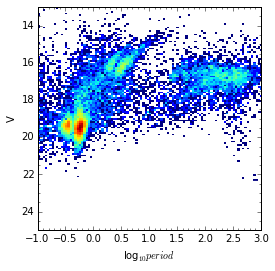

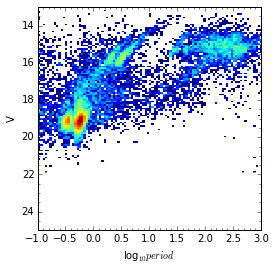

In [10]:
## MACHO data show a handful of period-luminosity relationships
## Not as structured as OGLE data but still present
plot_mag_period(macho, "per_b", "vmag", "log$_{10} period$", "V", xlim=(-1.,3.), ylim=(25,13), histo=True)
plot_mag_period(macho, "per_b", "rmag", "log$_{10} period$", "V", xlim=(-1.,3.), ylim=(25,13), histo=True)

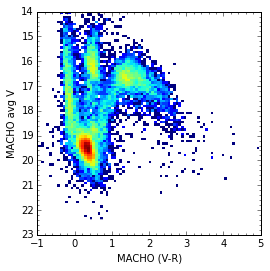

In [11]:
plot_color_mag(macho, "vmag", "rmag", "vmag", "MACHO (V-R)", "MACHO avg V", xlim=(-1,5), ylim=(23, 14), histo=True)

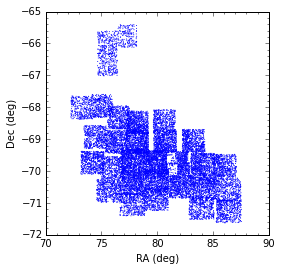

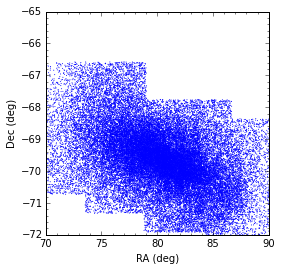

In [12]:
plot_ra_dec(macho)
plot_ra_dec(ogle, xlim=(70,90), ylim=(-72,-65))

### The matches are confined to be within 3" of each other

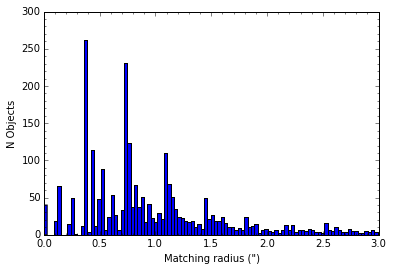

In [13]:
plt.hist(match.matchrad, bins=100)
plt.xlabel('Matching radius (")')
plt.ylabel('N Objects')
plt.minorticks_on()
plt.show()

### Both samples roughly survey the same region: the LMC. Matching the two should reflect that

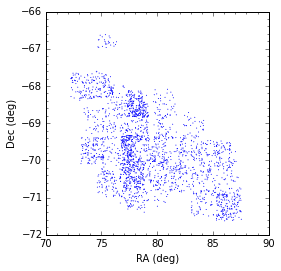

In [14]:
plot_ra_dec(match)

###Stars from both are observed in V-bands covering similar wavelength ranges. The matched magnitudes should correlate.

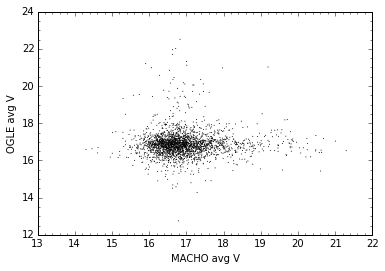

In [15]:
plt.scatter(match.vmag, match.V_mean, s=1, edgecolor="None", c='k')
plt.xlabel("MACHO avg V")
plt.ylabel("OGLE avg V")
plt.minorticks_on()
plt.show()

###Stars from both show periodicity in their respective surveys. There should be some relationship between them

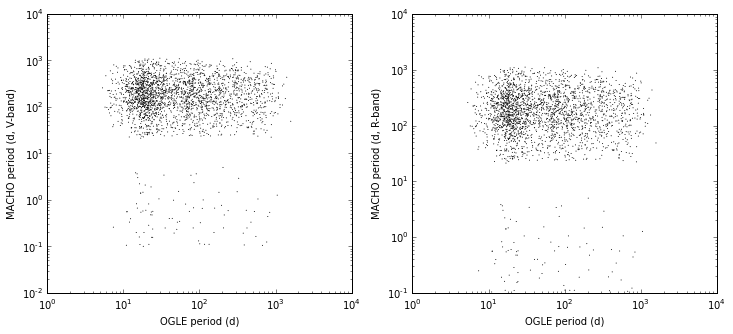

In [16]:
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(match.p, match.per_b, s=1, edgecolor="None", c='k')
plt.xlabel("OGLE period (d)")
plt.ylabel("MACHO period (d, V-band)")
plt.minorticks_on()
plt.xscale("log")
plt.yscale("log")

plt.subplot(122)
plt.scatter(match.p, match.per_r, s=1, edgecolor="None", c='k')
plt.xlabel("OGLE period (d)")
plt.ylabel("MACHO period (d, R-band)")
plt.minorticks_on()
plt.xscale("log")
plt.yscale("log")

plt.show()

### Maybe there's a color-magnitude relationship?

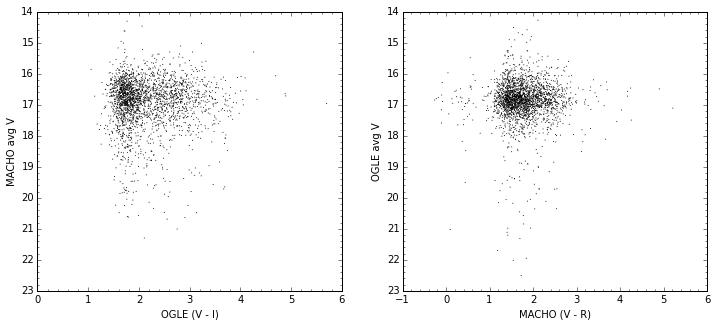

In [17]:
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(match.V_mean - match.I_mean, match.vmag, s=1, edgecolor="None", c='k')
plt.xlabel("OGLE (V - I)")
plt.ylabel("MACHO avg V")
plt.minorticks_on()
plt.ylim(23, 14)

plt.subplot(122)
plt.scatter(match.vmag - match.rmag, match.V_mean, s=1, edgecolor="None", c='k')
plt.xlabel("MACHO (V - R)")
plt.ylabel("OGLE avg V")
plt.minorticks_on()
plt.ylim(23, 14)

plt.show()